In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target

In [3]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Впредь ___df___ будут обозначаться исходные (неотредактированные) данные, а ___data___ - данные без выбросов

- `CRIM` — уровень преступности на душу населения;
- `ZN` — процент земли, застроенной жилыми домами (только для участков площадью свыше 25000 кв. - футов);
- `INDUS` — процент деловой застройки;
- `CHAS` — 1, если участок граничит с рекой; 0 в противном случае (бинарный признак);
- `NOX` — концентрация оксида азота, деленная на 10^7;
- `RM` — среднее число комнат (по всем домам рассматриваемого участка);
- `AGE` — процент домов, построенных до 1940 г. и занимаемых владельцами;
- `DIS` — взвешенное расстояние до 5 деловых центров Бостона;
- `RAD` — индекс удаленности до радиальных магистралей;
- `TAX` — величина налога в `$10000`;
- `PTRATIO` — количество учащихся, приходящихся на одного учителя (по городу);
- `B` = 1000(AA − 0.63)^2, где `AA` — доля афро-американцев;
- `LSTAT` — процент жителей с низким социальным статусом;
- `MEDV` — Median value of owner-occupied homes in `$1000`.
Признак `CHAS` — бинарный, остальные — количественные. Выходом является переменная `MEDV`, равная медианному значению цены строения (по всем домам участка) в `$1000`.

> Объясните почему значение коэффициента корреляции между `MEDV` и переменными `RM` и `LSTAT` имеет противоположные знаки (исходя из описания переменных).

> ___Показатель RM (количество комнат) имеет положительное влияние на стоимоть жилья, в то время как LSTAT (процент жителей с низким социальным статусом) имеет негативное влияние на стоимость жилья___

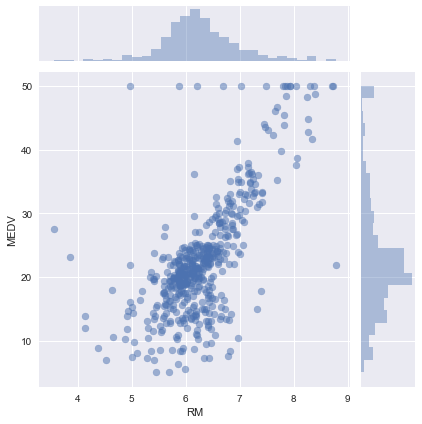

In [4]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

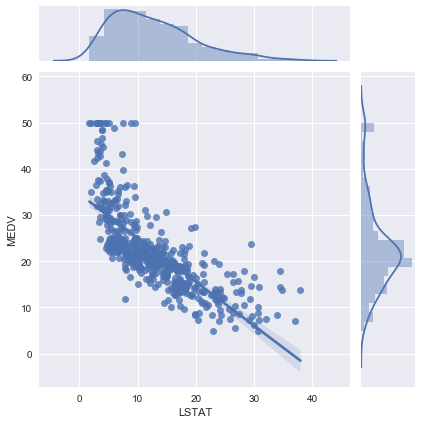

In [5]:
sns.jointplot(data["LSTAT"], data["MEDV"], kind="reg");

Также можем сделать следующие предположения:

- 16 наблюдений `MEDV` имеют значение 50.0. Скорее всего эти наблюдения содержали пропуски или не было возможности указать действительную цену дома, поэтому эти наблюдения могут быть исключены из набора данных.
- одно наблюдение признака `RM` имеет значение 8.78. Это наблюдение может рассматриваться как выброс и может быть исключено из набора данных;
- два наблюдения признака `RM` имеют значения меньше 4. Наблюдения можно рассматривать как выбросы и должны быть исключены из набора данных.

Итак, модель которую мы будем строить имеет следующий вид:

$$MEDV = \theta_0 + \theta_1 \times RM$$

Исключаем выбросы для ___data___

In [4]:
data = data.loc[data['MEDV'] != 50]
data = data.loc[data['RM'] != 8.78]
data = data.loc[data['RM'] > 4]

Также я посчитал выбросами значения `MEDV` равные 5.0

In [5]:
data = data.loc[data['MEDV'] != 5]
data.shape

(485, 14)

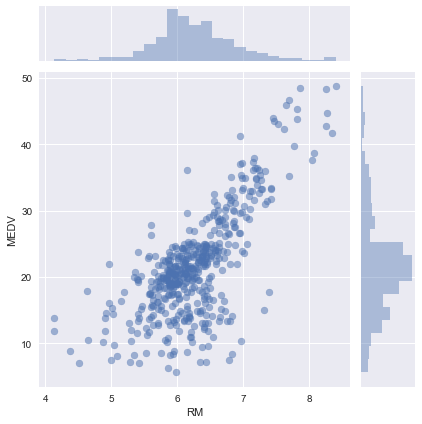

In [6]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

In [6]:
X = data["RM"]
y = data["MEDV"]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [56]:
class GDRegressor:

    def __init__(self, alpha=0.04, n_iter=100, progress=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.disable = not progress
        

    def fit(self, X, y):
        # PUT YOUR CODE HERE
        theta_zero = 0
        theta_one = 0
        theta_zero_history = []
        theta_one_history = []
        cost_history = []
        grad_zero_history = []
        grad_one_history = []
        
        for i in range(self.n_iter):
            for_cost = 0
            error_zero = 0
            error_one = 0
            
            for j in range(len(list(X))):
                error_one += ((theta_zero + theta_one*(list(X)[j]) - list(y)[j])*(list(X)[j]))
            for j in range(len(list(X))):
                error_zero += (theta_zero + theta_one*(list(X)[j]) - list(y)[j])
                for_cost += (theta_zero + theta_one*(list(X)[j]) - (list(y)[j]))**2
            
            grad_one = error_one*self.alpha/len(list(y))
            grad_zero = error_zero*self.alpha/len(list(y))
            theta_zero -= grad_zero
            theta_one -= grad_one
            
            theta_zero_history.append(theta_zero)
            theta_one_history.append(theta_one)
            cost = for_cost/(2*len(list(y)))
            cost_history.append(cost)
            grad_zero_history.append(grad_zero/self.alpha)
            grad_one_history.append(grad_one/self.alpha)
            
            self.grad_zero_history = grad_zero_history
            self.grad_one_history = grad_one_history
            self.loss_history = cost_history
            self.intercept_history = theta_zero_history
            self.coef_history = theta_one_history
            self.coef_ = theta_one
            self.intercept_ = theta_zero
        return self.coef_, self.intercept_

    def predict(self, X_test):
        predictions = []
        
        for i in range(len(list(X_test))):
            predictions.append(self.coef_*list(X_test)[i]+self.intercept_)
        
        self.predictions = predictions
        return self.predictions

In [57]:
model = GDRegressor(alpha=0.04, n_iter=100)
%time model.fit(X_train, Y_train)

Wall time: 7.96 s


(3.5985146558596313, -0.6278515314345957)

In [141]:
model.coef_, model.intercept_

(3.5985146558596313, -0.6278515314345957)

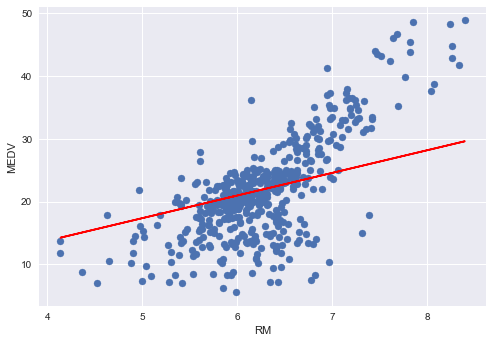

In [409]:
plt.scatter(data["RM"], data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(X_train, model.coef_ * X_train + model.intercept_, "r");

In [410]:
def plot_coeffs(model):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)
    plt.plot(list(range(model.n_iter)), model.intercept_history)
    plt.subplot(122)
    plt.plot(list(range(model.n_iter)), model.coef_history);

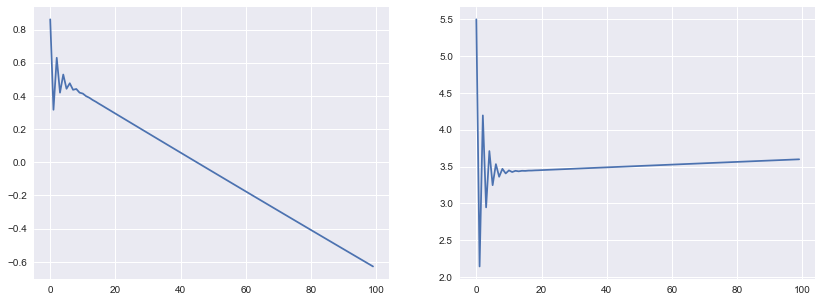

In [411]:
plot_coeffs(model)

In [44]:
def plot_loss_function(model):
    plt.xlabel("Iterations")
    plt.ylabel("Average square loss")
    plt.plot(np.arange(model.n_iter), model.loss_history);

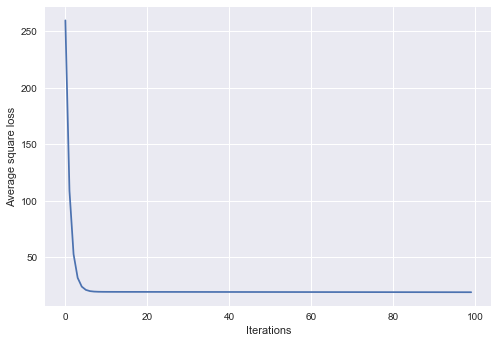

In [413]:
plot_loss_function(model)

### Оценка качества модели

Итак, мы нашли коэффициенты $\theta$, теперь надо как-то оценить качество работы полученной модели. Для этого мы воспользуемся коэффициентом детерминации $R^2$:

$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y_i})^2}{\sum_{i=1}^{m}(y_i - \overline{y})^2}$$

и среднеквадратичной ошибкой:

$$RMSE = \sqrt{\frac{\sum_{i=1}^{m}(\hat{y_i} - y_i)^2}{m}}$$

[Коэффициент детерминации](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью. Более точно — это единица минус доля необъяснённой дисперсии (дисперсии случайной ошибки модели, или условной по признакам дисперсии зависимой переменной) в дисперсии зависимой переменной.

Среднеквадратичная ошибка характеризует отклонение реальных данных от линии регрессии и измеряется в тех же единицах, что и зависимая переменная ($y$).

Вашей задачей является написать две функции для вычисления коэфиициента детерминации и среднеквадратичной ошибки:

$$ \hat{y_i} $$ Это значения, предсказанные моделью

$$ y_i $$ Это реальные значения y

$$ \overline{y} $$
Это среднее значение реального y

Коэфф. детерминации измеряется в диапазоне [0;1]

In [82]:
Y_pred = model.predict(X_test)

In [83]:
np.mean(Y_test)

21.989440993788822

In [26]:
def rmse(y_hat, y):
    upper_sum = 0
    
    for i in range(len(list(y_hat))):
        upper_sum += (list(y)[i]-list(y_hat)[i])**2
    
    return (upper_sum/len(y))**0.5

In [85]:
def r_squared(y_hat, y):
    y_overline = np.mean(y)
    upper_sum = 0
    lower_sum = 0
    
    for i in range(len(list(y))):
        upper_sum += (list(y)[i]-list(y_hat)[i])**2
        lower_sum += (list(y)[i]-y_overline)**2
        
    return 1 - (upper_sum/lower_sum)

In [86]:
r_squared(Y_pred, Y_test), rmse(Y_pred, Y_test)

(0.3665841033911881, 6.771599406611001)

### Gradient check

In [16]:
def gradient_check(x, theta, epsilon=1e-7):
    thetaplus = theta + epsilon                               
    thetaminus = theta - epsilon                             
    J_plus = np.dot(thetaplus, x)                 
    J_minus = np.dot(thetaminus, x)             
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    grad = x
    numerator = np.linalg.norm(grad - gradapprox) #always >=0                  
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)   
    difference = numerator / denominator                              
    if difference < 1e-7:
        print("The gradient is correct")
    else:
        print("The gradient is wrong")
    
    return difference

In [17]:
theta = model.coef_

In [18]:
gradient_check(X_train, theta, epsilon=1e-7)

The gradient is correct


1.0072529274374063e-09

In [19]:
theta_zero = model.intercept_
gradient_check(X_train, theta_zero, epsilon=1e-7)

The gradient is correct


2.752620436570885e-10

### Learning curves

In [64]:
train_sizes = [1, 16, 64, 128, 240, 324]

In [65]:
def learn_curves(model):
    upper = []
    lower = []
    for i in range(len(train_sizes)):
        size = train_sizes[i]
        model.fit(X_train[:size], Y_train)
        Y_pred = model.predict(X_test)
        Y_train_pred = model.predict(X_train[:size])
        upper.append((rmse(Y_pred, Y_test))**2)
        lower.append((rmse(Y_train_pred, Y_train))**2)
        
    plt.style.use('seaborn')
    plt.plot(train_sizes, lower, label = 'Training error')
    plt.plot(train_sizes, upper, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,80)

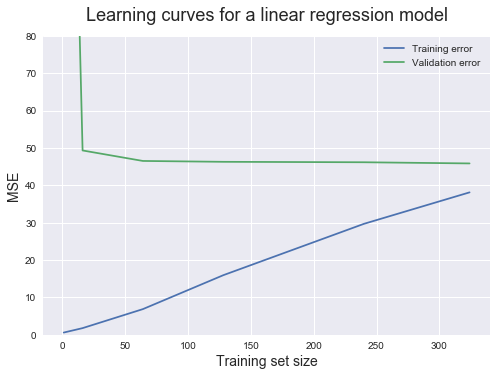

In [32]:
learn_curves(model)

# Проведем небольшой анализ регрессионных остатков:

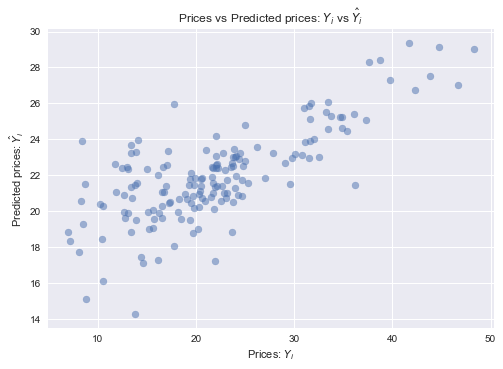

In [206]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

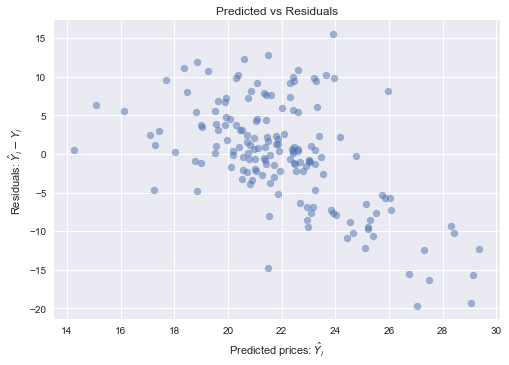

In [207]:
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Residuals: $\hat{Y}_i - Y_i$")
plt.title("Predicted vs Residuals");
plt.scatter(Y_pred, (Y_pred-Y_test), alpha=0.5);

### Если исключить выброы
R^2 = 0.366, RMSE = 6.771

In [208]:
X_init = df["RM"]
y_init = df["MEDV"]
X_train_init, X_test_init, Y_train_init, Y_test_init = train_test_split(X_init, y_init, test_size=0.33, random_state=18)

In [209]:
model_unclean = GDRegressor(alpha=0.04, n_iter=100)
model_unclean.fit(X_train_init, Y_train_init)
model_unclean.intercept_, model_unclean.coef_

(-1.0726158227418863, 3.806808761118752)

In [210]:
Y_pred_init = model_unclean.predict(X_test_init)

In [211]:
r_squared(Y_pred_init, Y_test_init), rmse(Y_pred_init, Y_test_init)

(0.35285913259014934, 7.309555219631523)

### Если оставить выброы
R^2 = 0.353, RMSE = 7.309

## Нормализация

Вы должны были обратить внимание, что увеличилось необходимое число итераций для сходимости алгоритма. Одним из способов повлиять на это является нормализация признаков. Мы будем использовать один из самых простых и распространенных способов нормализации - Standart Scaling (Z-score normalization):

$$x' = \frac{x - \overline{x}}{\sigma_x}$$

> Замечание: Про важность нормализации признаков можно почитать [тут](https://www.robertoreif.com/blog/2017/12/16/importance-of-feature-scaling-in-data-modeling-part-1-h8nla) и [тут](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling).

Напишите функцию `z_scaler` для нормализации значений:

Еще одним из распространенных методов нормализации является min-max нормализация:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Нормализацю будем проводить для ___data___

###### Z_score norm.

In [9]:
def z_scaler(feature):
    return (feature - feature.mean()) / feature.std()

In [215]:
X_z_scaled = z_scaler(X)
y_z_scaled = z_scaler(y)

In [216]:
X_train_z_scaled, X_test_z_scaled, Y_train_z_scaled, Y_test_z_scaled = train_test_split(X_z_scaled, y_z_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
model.fit(X_train_z_scaled, Y_train_z_scaled)

(0.737470221738676, -0.0032845451093428957)

In [217]:
Y_pred_z_scaled = model.predict(X_test_z_scaled)
rmse(Y_pred_z_scaled, Y_test_z_scaled), r_squared(Y_pred_z_scaled, Y_test_z_scaled)

(0.7122217078794596, 0.5714917056101048)

### После Z-scal'инга данных ___data___
R^2 = 0.571, RMSE = 0.712

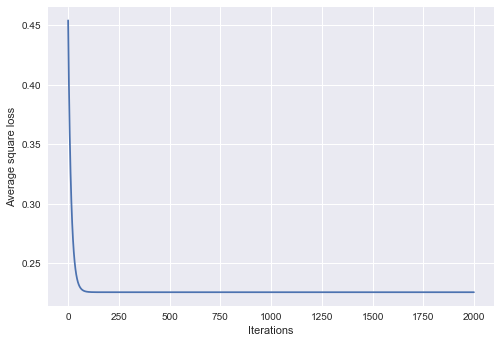

In [218]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

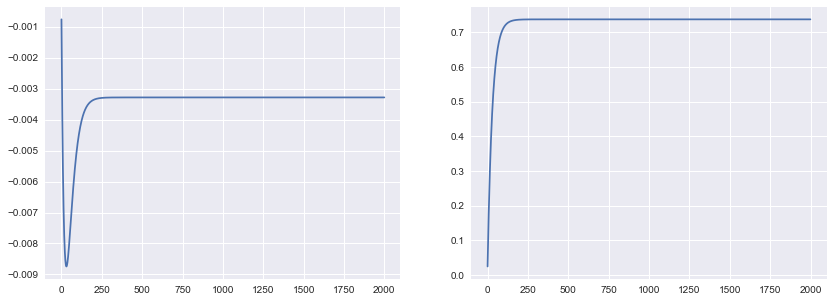

In [219]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

###### Min-max norm.

In [220]:
def min_max(feature):
    ma = np.max(feature)
    mi = np.min(feature)
    min_max = []
    for i in range(len(list(feature))):
        min_max.append((list(feature)[i]-mi)/(ma-mi))
    return min_max

In [221]:
X_mm_scaled = min_max(X)
y_mm_scaled = min_max(y)

In [223]:
X_train_mm_scaled, X_test_mm_scaled, Y_train_mm_scaled, Y_test_mm_scaled = train_test_split(X_mm_scaled, y_mm_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.04, n_iter=2000)
model.fit(X_train_mm_scaled, Y_train_mm_scaled)

(0.6715892654651101, 0.0393064971090762)

In [224]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test), r_squared(Y_pred, Y_test)

(0.7141434340631293, 0.5691761722400772)

### После mm-scal'инга данных ___data___
R^2 = 0.569, RMSE = 0.714

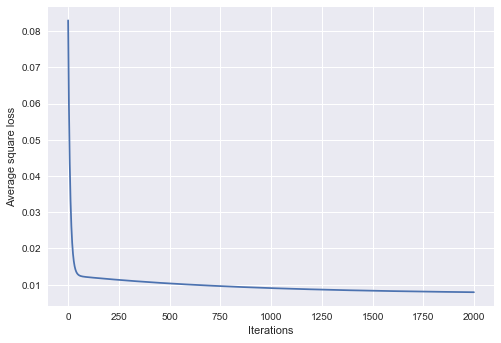

In [225]:
plt.xlabel("Iterations")
plt.ylabel("Average square loss")
plt.plot(np.arange(model.n_iter), model.loss_history);

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(init_X, init_y, test_size = 0.33, random_state = 18)

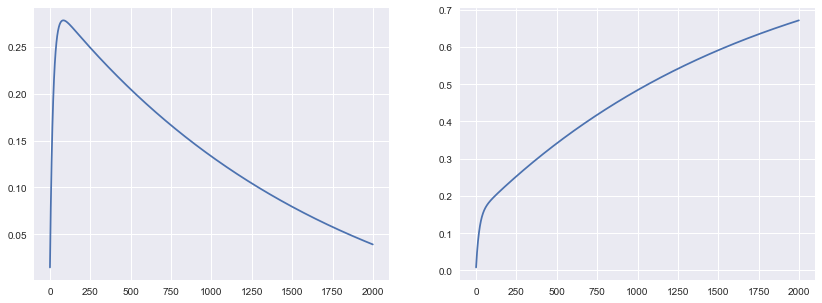

In [226]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(list(range(model.n_iter)), model.intercept_history)
plt.subplot(122)
plt.plot(list(range(model.n_iter)), model.coef_history);

Значения R^2 и RMSE очень близки после z-scal'инга и mm-scal'инга, поэтому сказать, какой из них даёт лучший результат при данной выборке нельзя

### Пример с использованием библиотеки sklearn

Проделаем теже шаги с использованием библиотеки `sklearn`. Для начала построим модель:

In [459]:
from sklearn.linear_model import SGDRegressor

max_iter = 100
eta0 = 0.0001
model = SGDRegressor(
    loss='squared_loss',
    learning_rate='constant',
    max_iter=max_iter,
    eta0=eta0,
    alpha=0.0002
)

Чтобы нормализовать значения для обучения и валидации модели воспользуйтесь `StandardScaler` из библиотеки `sklearn`:

Сначала для ___data___

In [460]:
X_for_ready_LR = data[["RM"]]
y_for_ready_LR = data["MEDV"]

In [461]:
X_train, X_test, Y_train, Y_test = train_test_split(X_for_ready_LR, y_for_ready_LR, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

In [476]:
len(X_test)/len(X_for_ready_LR)

0.3319587628865979

In [473]:
model.fit(X_train, Y_train.ravel())

SGDRegressor(alpha=0.0002, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [474]:
model.coef_, model.intercept_

(array([0.56397836]), array([8.65287391e-05]))

In [467]:
Y_pred_for_ready_LR = model.predict(X_test)

Чтобы найти среднеквадратичную ошибку и коэффициент детерминации:

In [307]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score(Y_test, Y_pred_for_ready_LR), mean_squared_error(Y_test, Y_pred_for_ready_LR)

(0.5531806226034095, 0.5827995213663919)

Попробуем c выбросами ___df___

In [344]:
init_X_for_ready_LR = df[['RM']]
init_y_for_ready_LR = df["MEDV"]

In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(init_X_for_ready_LR, init_y_for_ready_LR, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

model.fit(X_train, Y_train.ravel())

Y_pred = model.predict(X_test)

In [346]:
r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)

(0.49627516090861723, 0.487675136416123)

In [347]:
model.coef_, model.intercept_

(array([0.55180515]), array([8.19785037e-05]))

Для ___data___:
R^2: 0.55, RMSE = 0.58
Для ___df___:
R^2: 0.55, RMSE = 8.19e-5
Хотя стоит отметить, что эти значения постоянно меняются при повторном запуске SGDRegression от sklearn

## Mini-batch

In [14]:
class MBGDRegressor:

    def __init__(self, alpha=0.04, n_epoch=5, m=200, bs=20, progress=True):
        self.alpha = alpha
        self.n_epoch = n_epoch
        self.m = m
        self.bs = bs
        self.disable = not progress
        

    def fit(self, X, y):
        # PUT YOUR CODE HERE
        theta_zero = 0
        theta_one = 0
        theta_zero_history = []
        theta_one_history = []
        cost_history = []
        for i in range(self.n_epoch):
            for k in range(0, self.m, self.bs):
                X_o = list(X)[k:k+self.bs]
                y_o = list(y)[k:k+self.bs]
                
                for_cost = 0
                error_zero = 0
                error_one = 0
            
                for j in range(len(y_o)):
                    error_one += ((theta_zero + theta_one*(X_o[j]) - y_o[j])*(X_o[j]))
                for j in range(len(y_o)):
                    error_zero += (theta_zero + theta_one*(X_o[j]) - y_o[j])
                    for_cost += (theta_zero + theta_one*(X_o[j]) - y_o[j])**2
                grad_one = error_one*self.alpha/len(y)
                grad_zero = error_zero*self.alpha/len(y)
                theta_zero -= grad_zero
                theta_one -= grad_one
            
            theta_zero_history.append(theta_zero)
            theta_one_history.append(theta_one)
            cost = for_cost/(2*len(y_o))
            cost_history.append(cost)
            
        self.loss_history = cost_history
        self.intercept_history = theta_zero_history
        self.coef_history = theta_one_history
        self.coef_ = theta_one
        self.intercept_ = theta_zero
        return self.coef_, self.intercept_

    def predict(self, X_test):
        predictions = []
        
        for i in range(len(list(X_test))):
            predictions.append(self.coef_*list(X_test)[i]+self.intercept_)
        
        self.predictions = predictions
        return self.predictions

In [15]:
model = MBGDRegressor(alpha=0.04)
%time model.fit(X_train, Y_train)

Wall time: 6 ms


(3.38431055082519, 0.5008453223394241)

# Вторая часть

In [220]:
X_filtered = data[(data["MEDV"] < 50)][["RM", "LSTAT"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]

In [221]:
X_scaled = z_scaler(X_filtered)
y_scaled = z_scaler(y_filtered)

## Векторная реализация линейной регрессии

In [61]:
class GDRegressor:
    def __init__(self, alpha=0.01, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.hstack([np.ones((len(X), 1)), X]) #output horizontally stacked array 
        theta = np.zeros(X.shape[1]) #we make a vector, which length is equal to the amount of features
        self.theta_history = theta.copy()
        m = len(X)

        for i in range(self.n_iter):
            error = X @ theta - y # (1)
            gradient = (1/m) * (X.T @ error) #(2)
            theta -= self.alpha * gradient # (3)
            self.theta_history = np.vstack([self.theta_history, theta])
        
        self.theta = theta
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X_test):
        X_test = np.hstack([np.ones((len(X_test), 1)), X_test])
        answers = X_test.dot(self.theta)
        return answers

In [62]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.01, n_iter=300)
%time model.fit(X_train, Y_train)

Wall time: 84.7 ms


In [43]:
model.theta

array([-0.02617845,  0.42780081, -0.49747377])

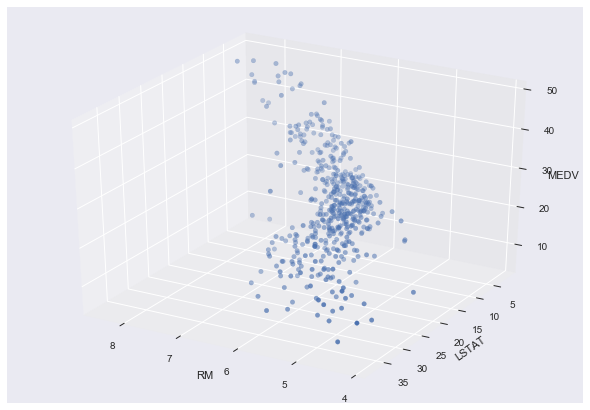

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()#figsize=(15, 10))
ax = Axes3D(fig)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV');
ax.view_init(azim=120)
ax.scatter3D(data["RM"], data["LSTAT"], data["MEDV"])
plt.show()

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [51]:
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)

(0.6891117805073479, 0.36726459944441)

## PolynomialFeatures

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [143]:
poly = PolynomialFeatures(4, include_bias=False)
X_filtered_poly = poly.fit_transform(X_filtered)

In [139]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_filtered_poly, y_filtered, test_size = 0.33, random_state = 18)
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
Y_train = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
X_test = x_scaler.transform(X_test)
Y_test = y_scaler.transform(Y_test.values.reshape(-1, 1))

In [142]:
X_filtered

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [144]:
X_filtered_poly

array([[6.57500000e+00, 4.98000000e+00, 4.32306250e+01, ...,
        1.07213679e+03, 8.12051897e+02, 6.15059840e+02],
       [6.42100000e+00, 9.14000000e+00, 4.12292410e+01, ...,
        3.44427430e+03, 4.90276703e+03, 6.97886477e+03],
       [7.18500000e+00, 4.03000000e+00, 5.16242250e+01, ...,
        8.38423876e+02, 4.70264192e+02, 2.63766833e+02],
       ...,
       [6.97600000e+00, 5.64000000e+00, 4.86645760e+01, ...,
        1.54800070e+03, 1.25153726e+03, 1.01185065e+03],
       [6.79400000e+00, 6.48000000e+00, 4.61584360e+01, ...,
        1.93821119e+03, 1.84863240e+03, 1.76319369e+03],
       [6.03000000e+00, 7.88000000e+00, 3.63609000e+01, ...,
        2.25780827e+03, 2.95050235e+03, 3.85571451e+03]])

In [140]:
X_train

array([[-0.61533438,  0.47724511, -0.6341349 , ...,  0.22329875,
         0.01599322, -0.11790035],
       [ 1.10559412, -1.01623065,  1.09910438, ..., -0.8165571 ,
        -0.58904464, -0.39692023],
       [-0.52245331,  0.66160571, -0.54740004, ...,  0.45580889,
         0.18212111, -0.02110237],
       ...,
       [-0.64863137,  0.26964578, -0.6650393 , ...,  0.0031222 ,
        -0.13784581, -0.20350321],
       [-0.01774108,  0.04655397, -0.06250159, ..., -0.09237575,
        -0.25009382, -0.27232819],
       [-0.46987912, -0.41202365, -0.49796041, ..., -0.54123924,
        -0.46456007, -0.35698914]])

In [56]:
model = SGDRegressor(
    loss='squared_loss',
    penalty='l1',
    alpha=0.01,
    learning_rate='constant',
    max_iter=1000,
    eta0=0.005
)
model.fit(X_train, Y_train.ravel())

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [57]:
Y_pred = model.predict(X_test)

In [58]:
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

(0.2709142454908796, 0.792296098297581)

In [59]:
model.coef_, model.intercept_

(array([ 0.        ,  0.        ,  0.04976776,  0.        ,  0.        ,
         0.23877643, -0.1457281 ,  0.        ,  0.        ,  0.42452685,
        -0.37416132,  0.        ,  0.        ,  0.00537371]),
 array([0.01305458]))

In [60]:
poly.get_feature_names(X_filtered.columns)

['RM',
 'LSTAT',
 'RM^2',
 'RM LSTAT',
 'LSTAT^2',
 'RM^3',
 'RM^2 LSTAT',
 'RM LSTAT^2',
 'LSTAT^3',
 'RM^4',
 'RM^3 LSTAT',
 'RM^2 LSTAT^2',
 'RM LSTAT^3',
 'LSTAT^4']

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [75]:
train_sizes = [1, 50, 100, 200, 388]

In [76]:
target = 'MEDV'

In [77]:
features = ['RM', 'LSTAT']

In [80]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = str(features)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,80)

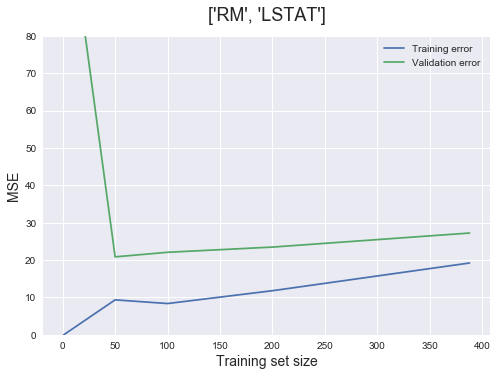

In [84]:
lstat = ['RM', 'LSTAT']
learning_curves(LinearRegression(), data, lstat, target, train_sizes, cv=5)

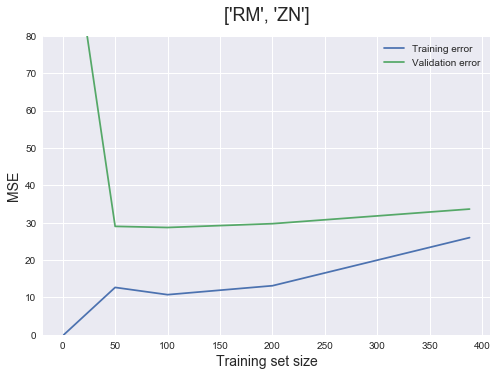

In [85]:
zn = ['RM', 'ZN']
learning_curves(LinearRegression(), data, zn, target, train_sizes, cv=5)

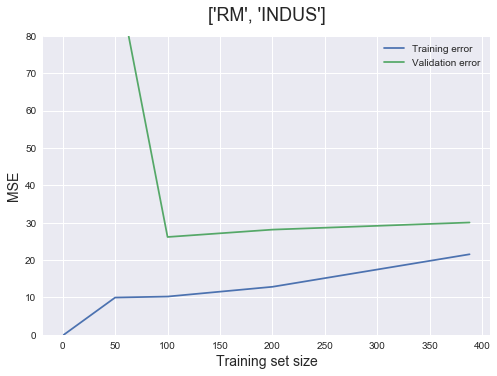

In [86]:
indus = ['RM', 'INDUS']
learning_curves(LinearRegression(), data, indus, target, train_sizes, cv=5)

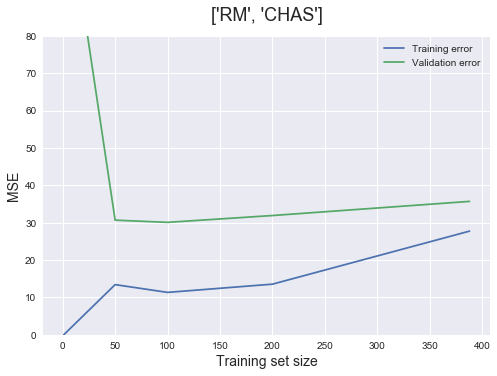

In [88]:
chas = ['RM', 'CHAS']
learning_curves(LinearRegression(), data, chas, target, train_sizes, cv=5)

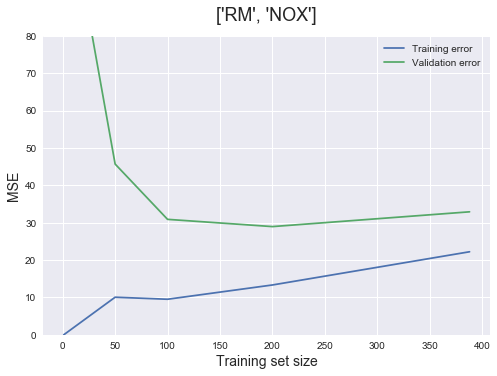

In [89]:
nox = ['RM', 'NOX']
learning_curves(LinearRegression(), data, nox, target, train_sizes, cv=5)

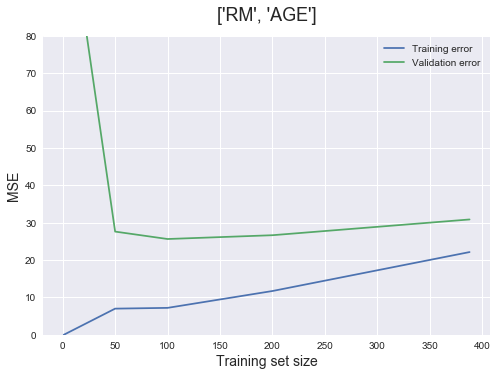

In [90]:
age = ['RM', 'AGE']
learning_curves(LinearRegression(), data, age, target, train_sizes, cv=5)

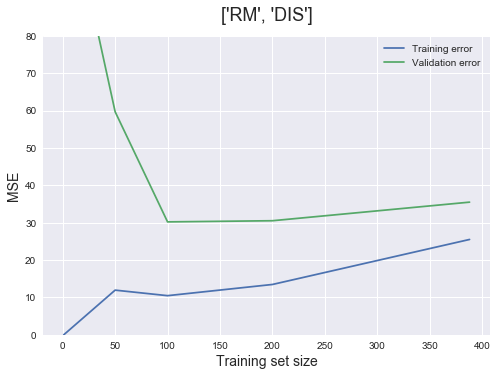

In [91]:
dis = ['RM', 'DIS']
learning_curves(LinearRegression(), data, dis, target, train_sizes, cv=5)

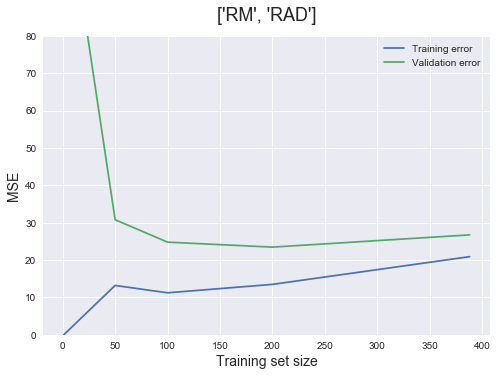

In [92]:
rad = ['RM', 'RAD']
learning_curves(LinearRegression(), data, rad, target, train_sizes, cv=5)

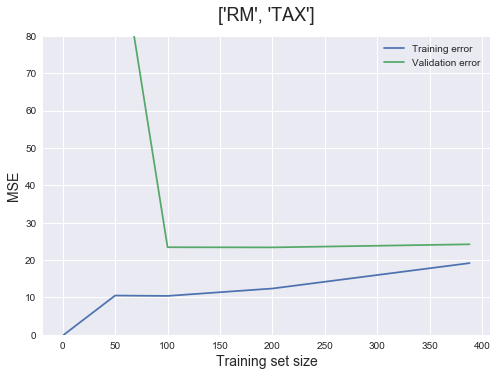

In [93]:
tax = ['RM', 'TAX']
learning_curves(LinearRegression(), data, tax, target, train_sizes, cv=5)

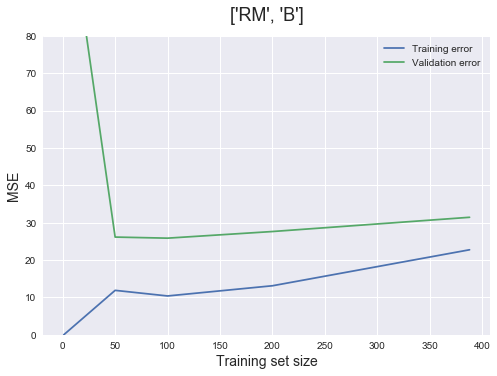

In [94]:
b = ['RM', 'B']
learning_curves(LinearRegression(), data, b, target, train_sizes, cv=5)

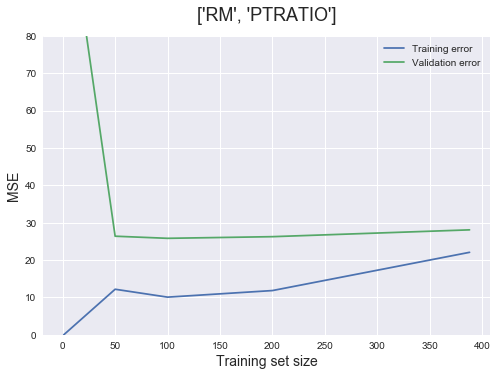

In [96]:
p = ['RM', 'PTRATIO']
learning_curves(LinearRegression(), data, p, target, train_sizes, cv=5)

Наименьшая разница между графиками у моделtq с TAX и PTRATIO

In [97]:
X_filtered

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [218]:
X_filtered = data[(data["MEDV"] < 50)][["RM", "LSTAT", "TAX", "PTRATIO"]]
y_filtered = data[(data["MEDV"] < 50)]["MEDV"]

In [219]:
X_scaled = z_scaler(X_filtered)
y_scaled = z_scaler(y_filtered)

In [102]:
X_train, X_test, Y_train, Y_test =\
    train_test_split(X_scaled, y_scaled, test_size=0.33, random_state=18)
model = GDRegressor(alpha=0.01, n_iter=300)
%time model.fit(X_train, Y_train)

Wall time: 75.8 ms


In [103]:
model.theta

array([-0.00730728,  0.38458425, -0.32116772, -0.17961916, -0.2273602 ])

## L1 Regularization

In [222]:
X_filtered_poly = poly.fit_transform(X_scaled)

In [234]:
class LassoRegression:

    def __init__(self, n_iter=100, l1 = 0.1, intercept=False):
        self.n_iter = n_iter
        self.l1 = l1
        self.intercept = intercept

    def fit(self, X, y):

        m, n = X.shape[0], X.shape[1]
        
        self.theta = np.full((n,), 0)
        
        for i in range(self.n_iter):
            theta_old = tuple(self.theta)
            
            for j in range(n):
                x_j = [X[i][j] for i in range(len(X))]
                x_j = pd.Series(x_j)
                y_hypoth = X.dot(self.theta)
                rho = x_j.T.dot(pd.Series(y.values - y_hypoth + self.theta[j] * x_j))
                z_j = sum(x_j ** 2)
                print(j)
                print(rho)
                print(z_j)
            
                if self.intercept and j == 0:
                    self.theta[j] = rho / z_j
                    continue
                    
                if rho < - self.l1:  
                    self.theta[j] = (rho + self.l1) / z_j
                elif rho > self.l1:
                    self.theta[j] = (rho - self.l1) / z_j
                else:
                    self.theta[j] = int(0)

            
    def predict(self, X_test):
        return X_test.dot(self.theta)

In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered_poly, y_filtered, test_size=0.33, random_state=18)
model = LassoRegression(n_iter=1000, l1=1, intercept=True)
%time model.fit(X_train, Y_train)

0
1415.7348335584159
271.2784115860082
1
-1092.312343258676
272.36840326941586
2
6900.198348902103
1004.1149743629724
3
-869.9980198023728
552.5235487464113
4
2695.069063402623
905.2661026252654
5
-1038.1135781968721
6974.460525063382
6
-1701.2251099383964
2894.092958840864
7
2693.1131493736452
3169.641584267775
8
-3373.921353862553
6048.536294929429
9
-23045.743446924127
62911.73206382237
10
12869.817741422163
20109.840954402494
11
-9468.535269163216
18824.705026506763
12
9398.288024364998
27220.747162930038
13
-8919.515474541371
52005.885441974
0
692.6021771026393
271.2784115860082
1
-2299.4053864359
272.36840326941586
2
5436.8932992628415
1004.1149743629724
3
-620.9785128969676
552.5235487464113
4
3843.472357554728
905.2661026252654
5
1012.5706511756673
6974.460525063382
6
-2800.669752733696
2894.092958840864
7
3819.4548975726093
3169.641584267775
8
-625.13292478556
6048.536294929429
9
-16166.826785361207
62911.73206382237
10
7911.848809304456
20109.840954402494
11
-4592.07197210298

3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
27

0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036


4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783


0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
69

3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5


12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
629

13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
2010

9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293

12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
629

8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143


5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054

9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293

13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
2010

6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.300797031849

10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3

4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783


4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783


13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
2010

9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293

429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.

5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054

7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036


11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
60

7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
27

11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
60

18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-113

12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
629

2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947


0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947


0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.300797031849

9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293

13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
2010

0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903

8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143


9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293

10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3

11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
60

2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947


9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293

12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
629

12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
629

4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52

0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315


12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
629

8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143


3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
27

10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3169.641584267775
8
-3018.340739316503
6048.536294929429
9
-11389.468685058499
62911.73206382237
10
7015.064632727931
20109.840954402494
11
-5553.937492005315
18824.705026506763
12
6143.524043124903
27220.747162930038
13
-9104.29369263947
52005.885441974
0
-787.0519916511691
271.2784115860082
1
-2976.9647021758783
272.36840326941586
2
4123.740427605054
1004.1149743629724
3
429.3007970318493
552.5235487464113
4
7370.826345913036
905.2661026252654
5
409.1700843370143
6974.460525063382
6
-1190.4085229537293
2894.092958840864
7
8127.139112179893
3

In [171]:
X_train

array([[5.88900000e+00, 1.57100000e+01, 3.46803210e+01, ...,
        8.55924541e+03, 2.28333750e+04, 6.09122638e+04],
       [6.87100000e+00, 6.07000000e+00, 4.72106410e+01, ...,
        1.73947135e+03, 1.53668914e+03, 1.35754666e+03],
       [5.94200000e+00, 1.69000000e+01, 3.53073640e+01, ...,
        1.00841362e+04, 2.86808991e+04, 8.15730721e+04],
       ...,
       [5.87000000e+00, 1.43700000e+01, 3.44569000e+01, ...,
        7.11524303e+03, 1.74184059e+04, 4.26409697e+04],
       [6.23000000e+00, 1.29300000e+01, 3.88129000e+01, ...,
        6.48893081e+03, 1.34673957e+04, 2.79507908e+04],
       [5.97200000e+00, 9.97000000e+00, 3.56647840e+01, ...,
        3.54511163e+03, 5.91841308e+03, 9.88053892e+03]])

In [175]:
poly.get_feature_names(X_filtered.columns)

['RM',
 'LSTAT',
 'RM^2',
 'RM LSTAT',
 'LSTAT^2',
 'RM^3',
 'RM^2 LSTAT',
 'RM LSTAT^2',
 'LSTAT^3',
 'RM^4',
 'RM^3 LSTAT',
 'RM^2 LSTAT^2',
 'RM LSTAT^3',
 'LSTAT^4']

In [179]:
len(Y_train.values)

324

In [187]:
theta = np.full((14,), 0)
y_hypoth = X_train.dot(theta)
t = Y_train.values - y_hypoth
t = pd.Series(t)
t

0      21.7
1      24.8
2      17.4
3      24.5
4      21.4
       ... 
319    33.3
320    19.5
321    22.0
322    20.1
323    20.3
Length: 324, dtype: float64

In [205]:
rho = pd.Series(x_q).T.dot(t)
rho

44524.941699999996

In [189]:
X_filtered["RM"]

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 485, dtype: float64

In [194]:
qqqqq = pd.dframe(X_train)

AttributeError: module 'pandas' has no attribute 'dframe'

In [199]:
for j in range(14):
    x_j = [X_train[i][j] for i in range(len(X_train))]
    print(x_j)

[5.889, 6.871, 5.942, 6.433, 6.163, 6.431, 5.693, 6.219, 6.122, 6.943, 6.376, 6.069, 7.52, 5.404, 5.856, 6.77, 5.759, 6.54, 6.604, 7.645, 6.059, 6.976, 6.826, 6.112, 6.975, 5.99, 4.138, 6.193, 6.341, 5.344, 6.108, 6.383, 5.961, 5.708, 5.878, 5.682, 6.315, 5.841, 5.663, 6.301, 5.92, 6.095, 5.572, 5.859, 6.957, 7.088, 6.951, 6.51, 6.852, 5.987, 5.914, 6.006, 5.985, 6.24, 6.037, 6.404, 5.593, 5.888, 5.349, 6.431, 5.67, 5.88, 6.096, 5.888, 6.417, 6.951, 6.625, 7.454, 6.326, 6.251, 5.39, 6.631, 6.393, 5.876, 5.0, 5.854, 5.872, 7.147, 5.871, 6.064, 5.935, 6.145, 6.762, 5.404, 6.176, 6.939, 6.083, 6.092, 5.597, 7.853, 6.434, 6.114, 5.56, 6.021, 6.031, 5.887, 6.38, 6.326, 6.172, 6.29, 7.135, 6.879, 6.185, 6.474, 6.051, 5.399, 6.229, 5.604, 6.849, 7.313, 5.854, 6.019, 7.274, 7.241, 6.072, 6.335, 5.924, 6.212, 6.642, 6.471, 6.516, 6.406, 6.874, 6.162, 5.569, 6.312, 6.415, 5.986, 5.709, 8.398, 6.193, 5.713, 6.312, 6.372, 5.741, 6.728, 6.619, 6.495, 7.007, 5.961, 6.302, 6.195, 5.565, 5.706, 5.747,

In [200]:
x_q = [5.889, 6.871, 5.942, 6.433, 6.163, 6.431, 5.693, 6.219, 6.122, 6.943, 6.376, 6.069, 7.52, 5.404, 5.856, 6.77, 5.759, 6.54, 6.604, 7.645, 6.059, 6.976, 6.826, 6.112, 6.975, 5.99, 4.138, 6.193, 6.341, 5.344, 6.108, 6.383, 5.961, 5.708, 5.878, 5.682, 6.315, 5.841, 5.663, 6.301, 5.92, 6.095, 5.572, 5.859, 6.957, 7.088, 6.951, 6.51, 6.852, 5.987, 5.914, 6.006, 5.985, 6.24, 6.037, 6.404, 5.593, 5.888, 5.349, 6.431, 5.67, 5.88, 6.096, 5.888, 6.417, 6.951, 6.625, 7.454, 6.326, 6.251, 5.39, 6.631, 6.393, 5.876, 5.0, 5.854, 5.872, 7.147, 5.871, 6.064, 5.935, 6.145, 6.762, 5.404, 6.176, 6.939, 6.083, 6.092, 5.597, 7.853, 6.434, 6.114, 5.56, 6.021, 6.031, 5.887, 6.38, 6.326, 6.172, 6.29, 7.135, 6.879, 6.185, 6.474, 6.051, 5.399, 6.229, 5.604, 6.849, 7.313, 5.854, 6.019, 7.274, 7.241, 6.072, 6.335, 5.924, 6.212, 6.642, 6.471, 6.516, 6.406, 6.874, 6.162, 5.569, 6.312, 6.415, 5.986, 5.709, 8.398, 6.193, 5.713, 6.312, 6.372, 5.741, 6.728, 6.619, 6.495, 7.007, 5.961, 6.302, 6.195, 5.565, 5.706, 5.747, 7.47, 6.229, 5.731, 5.966, 7.249, 6.066, 6.63, 5.913, 6.142, 6.167, 5.852, 6.485, 6.417, 5.803, 6.202, 6.023, 6.101, 7.014, 5.783, 6.376, 5.608, 6.333, 6.655, 5.52, 5.427, 5.362, 5.965, 5.868, 6.546, 6.122, 6.727, 5.707, 6.232, 7.333, 5.957, 6.047, 6.513, 6.345, 5.96, 6.484, 5.85, 6.127, 6.458, 6.14, 6.245, 5.304, 5.786, 4.903, 5.794, 6.782, 5.983, 5.95, 6.316, 6.343, 7.155, 6.398, 6.405, 6.794, 4.628, 5.898, 6.861, 5.813, 6.279, 6.003, 6.015, 6.606, 6.436, 6.185, 6.442, 6.43, 6.208, 6.982, 5.926, 6.065, 6.162, 6.182, 5.836, 6.75, 5.57, 5.933, 6.209, 5.637, 6.223, 6.727, 7.82, 6.794, 5.036, 6.781, 6.425, 6.389, 6.98, 6.242, 6.151, 6.014, 6.152, 7.178, 7.691, 5.874, 6.167, 6.382, 6.49, 6.375, 5.998, 6.12, 6.812, 4.88, 6.678, 6.254, 7.041, 5.952, 6.782, 6.616, 6.495, 6.127, 6.968, 6.98, 7.107, 7.416, 6.113, 6.31, 7.079, 6.565, 6.549, 6.348, 4.906, 6.545, 6.009, 6.315, 6.461, 6.081, 5.272, 6.525, 5.617, 5.927, 5.834, 6.739, 6.842, 5.905, 5.807, 4.519, 6.211, 7.104, 5.628, 5.155, 5.949, 5.879, 5.983, 5.895, 6.096, 5.757, 5.968, 6.437, 6.167, 5.536, 5.594, 6.319, 6.701, 7.206, 6.286, 8.259, 5.857, 6.358, 6.593, 6.715, 5.884, 5.822, 5.648, 6.726, 5.012, 6.758, 5.787, 6.487, 6.86, 6.728, 7.287, 5.869, 5.87, 6.23, 5.972]

In [206]:
x_q = pd.Series(x_q)
z_j = sum(x_q ** 2)
z_j

12721.779144000006

In [231]:
1.7 = int(0)

SyntaxError: can't assign to literal (<ipython-input-231-41eac4870fed>, line 1)